In [1]:
using Distributions, StatsPlots, StatsFuns,Plots

# Homework on Accept-Reject Sampling

Suppose $X$ is a random variable that follows a half-normal distribution $N^+(0,2)$. Write an accept-reject program that uses the exponential distribution $Exp(2)$ as the proposal distribution to draw samples from $X$. The challenge is to find the value of `m`. 

## Draw the density plots of $X$ and $Exp(2)$ to visually inspect the distributions. What is the range in the values of $X$ that `m` is most likely to occur?

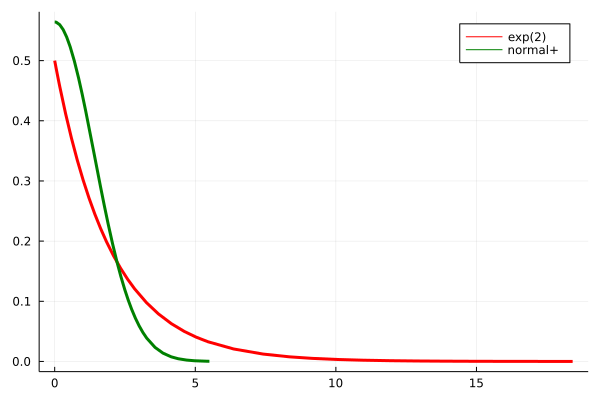

In [22]:
plot(Exponential(2), lw=3, color=:red, label="exp(2)")
dist = truncated(Normal(0, sqrt(2)); lower=0)
plot!(dist, lw=3, color=:green, label="normal+")

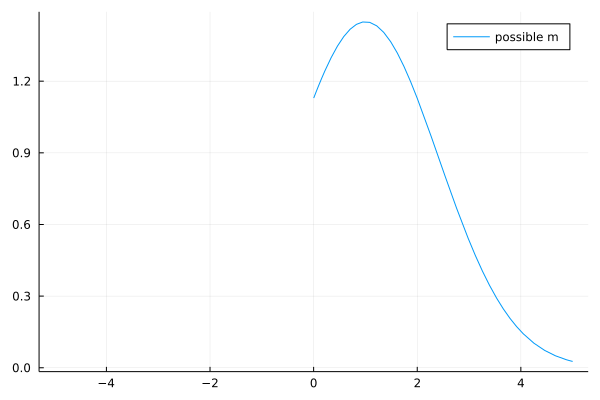

In [23]:
f(x)=pdf(dist, x)
g(x)=pdf(Exponential(2),x)
y(x) = f(x)/g(x)
plot(y,label="possible m")

我猜 m 可能在1~1.5之間。

## Write a program that calculates `m`. 
Hint: An _exact_ solution may be difficult and so an approximated value is enough. 

In [17]:
function cal_m(f,g)  
    x = argmax(y, 0:4)
    m = f(x)/g(x)
    return m 
end

cal_m (generic function with 1 method)

In [20]:
m = cal_m(f,g)
print("m = $m")

m = 1.4488675302115823

## Write an accept-reject sampling program for $X$ and use it to draw a random sample of 100,000 values.

In [39]:
function sampling(n)
    data=[]
    while length(data) < n
        x = rand(Exponential(2))
        y = rand(Uniform(0,m*g(x)))
        if y <= f(x)
            append!(data, x)
        end
    end
    return data    
end

sampling (generic function with 1 method)

In [40]:
sampling(1000)

1000-element Vector{Any}:
 1.4642611584117204
 0.5986354108937417
 0.5612215753493758
 0.5133209424943519
 1.5742060755423681
 0.9872026458727727
 0.15785118914715715
 1.9013554495050695
 1.3929159529099382
 2.047750243892139
 0.3407666257246105
 2.906643672608098
 2.6784094530149067
 ⋮
 0.47953024882716927
 0.8050537040929613
 1.7980030020418036
 1.7893319268707264
 0.8704812126624377
 1.641766277513369
 0.8029225663693431
 0.18636762451071096
 0.2112885326926771
 1.2799481398319656
 0.3070511298826961
 1.5396353327653256

## Draw a histogram of the sample and overlay it with the theoretical density. Calculate the mean and the variance of the sample and compare them to the theoretical values. Are they close?

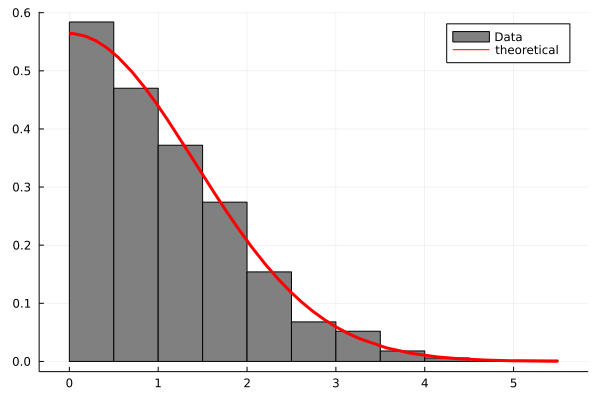

In [41]:
data = sampling(1000)
histogram(data, normalize=:pdf, color=:gray, label="Data")
plot!(dist, lw=3, color=:red, label="theoretical")

I consider that they are close in this graph.

In [45]:
print("data mean: ",mean(data),"\ndata var: ",var(data),"\n")
print("theoretical mean: ",mean(dist),"\ntheoretical var: ",var(dist))

data mean: 1.1145641716234582
data var: 0.7277294748853211
theoretical mean: 1.1283791670955128
theoretical var: 0.7267604552648372